In [14]:
# !pip install lazypredict

In [54]:
import pandas as pd
from string import digits
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
import re
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Prakhar
[nltk_data]     Jadaun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
training_df = pd.read_csv('temp/imp/Training.csv')
training_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [56]:
len(training_df.columns)

134

In [57]:
training_df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

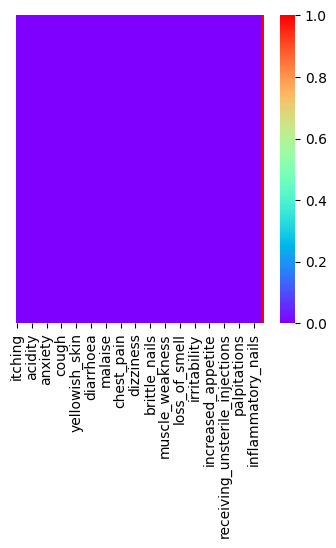

In [58]:
plt.figure(figsize=(4,4))
sns.heatmap(training_df.isna(),cmap='rainbow',yticklabels=False)
plt.show()

In [59]:
testing_df = pd.read_csv('temp/imp/Testing.csv')
# testing_df

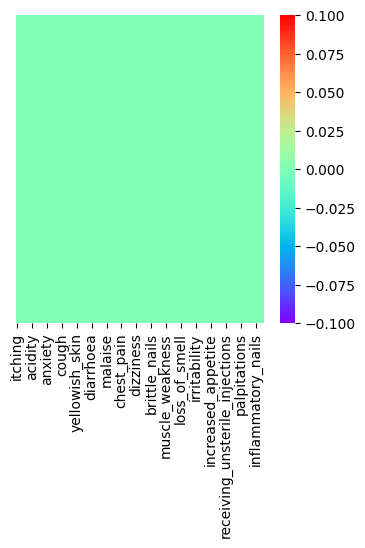

In [60]:
plt.figure(figsize=(4,4))
sns.heatmap(testing_df.isna(),cmap='rainbow',yticklabels=False)
plt.show()

In [61]:
# df = pd.concat([training_df,testing_df],axis=0)
# df.shape

In [62]:
# df.reset_index(inplace=True)

In [63]:
# df.drop(columns=['index'],inplace=True)

In [64]:
# X = df.drop(columns=['prognosis'])

In [65]:
# y = df['prognosis']

In [66]:
# X = X.iloc[:,:-1]

## **Without splitting the columns**

In [67]:
# X_train,y_train,X_test,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [68]:
X_train = training_df.drop(columns=['prognosis'])
y_train = training_df['prognosis']

In [69]:
X_train = X_train.iloc[:,:-1]

In [70]:
def update_columns(dataf):
    column_names = list(dataf.columns.values)
    split_list = [word.split('_') for word in column_names]

    lemmatizer = WordNetLemmatizer()

    lemmatized_list = [[lemmatizer.lemmatize(word) for word in sublist  if word not in set(stopwords.words('english'))] for sublist in split_list]

    joined_list = ['_'.join(word) for word in lemmatized_list]

    dataf = dataf.rename(columns=dict(zip(dataf.columns, joined_list)))
    return dataf

In [71]:
X_train = update_columns(X_train)

In [72]:
# column_names = list(X_train.columns.values)
# split_list = [word.split('_') for word in column_names]

# lemmatizer = WordNetLemmatizer()

# lemmatized_list = [[lemmatizer.lemmatize(word) for word in sublist  if word not in set(stopwords.words('english'))] for sublist in split_list]

# joined_list = ['_'.join(word) for word in lemmatized_list]

# X_train = X_train.rename(columns=dict(zip(X_train.columns, joined_list)))

In [73]:
X_test = testing_df.drop(columns=['prognosis'])
y_test = testing_df['prognosis']

In [74]:
X_test = update_columns(X_test)

In [75]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred = clf.predict(X_test)
y_pred

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Chicken pox'],
      dtype=object)

In [77]:
accuracy_score(y_test,y_pred)

0.9761904761904762

In [26]:
clf = LazyClassifier(verbose=0,custom_metric=None,ignore_warnings=True)

In [27]:
models, predictions = clf.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [03:10<00:00,  6.58s/it]


In [28]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,1.00,1.00,None,1.00,0.03
CategoricalNB,1.00,1.00,None,1.00,0.10
LGBMClassifier,0.98,0.99,None,0.98,1.99
BaggingClassifier,0.98,0.99,None,0.98,0.19
RidgeClassifier,0.98,0.99,None,0.98,0.06
RandomForestClassifier,0.98,0.99,None,0.98,0.34
QuadraticDiscriminantAnalysis,0.98,0.99,None,0.98,0.12
Perceptron,0.98,0.99,None,0.98,0.22
PassiveAggressiveClassifier,0.98,0.99,None,0.98,0.40


# **User input**

In [78]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred = clf.predict(X_test)
y_pred

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Chicken pox'],
      dtype=object)

In [80]:
accuracy_score(y_test,y_pred)

0.9761904761904762

In [81]:
#getting the input from the user

# I am having headache, stiff neck and hunger too.
# Migraine

# -- fungal infection---
# input = "I have been facing pain in right abdomen, what should I do?"
# input = "I am having headache, stiff neck and hunger too"
# input = "I am having stomach pain and vomitting"
input = "Facing continuous sneezing and watering from eyes"
#converting it to lowercase
input = input.lower()

In [82]:

# removing numbers
remove_digits = input.maketrans('', '', digits)
input = input.translate(remove_digits)
# REPLACING NEXT LINES BY 'WHITE SPACE'
input = input.replace(r'\n', " ")
# REPLACING CURRENCY SIGNS BY 'MONEY'
input = input.replace(r'£|\$', 'Money')
# REPLACING SPECIAL CHARACTERS BY WHITE SPACE
input = re.sub('[^A-Za-z0-9]+', ' ', input)
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
input = input.replace(r'\s+', ' ')

In [83]:
lemmatizer = WordNetLemmatizer()

In [84]:
tokens = input.split(' ')
tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))]
tokens = set(tokens)

In [85]:
tokens

{'continuous', 'eye', 'facing', 'sneezing', 'watering'}

In [86]:
columns = X_train.columns

In [87]:
columns

Index(['itching', 'skin_rash', 'nodal_skin_eruption', 'continuous_sneezing',
       'shivering', 'chill', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcer_tongue',
       ...
       'pu_filled_pimple', 'blackhead', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dent_nail', 'inflammatory_nail',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [88]:
test_vec = []
for c in columns:
    col_vec = c.split('_')
    if len(col_vec)==1:
        if col_vec[0] in tokens:
            test_vec.append(1)
        else: 
            test_vec.append(0)
    else:
        flag = False
        for temp in col_vec:
            if temp in tokens:
                test_vec.append(1)
                flag = True
                break
        if flag==False:
            test_vec.append(0)

In [89]:
len(test_vec)

132

In [90]:
# np.reshape(test_vec,)

In [91]:
# clf.predict([test_vec])

In [92]:
bnclf = BernoulliNB()

In [93]:
bnclf.fit(X_train,y_train)

BernoulliNB()

In [94]:
y_pred = bnclf.predict(X_test)
y_pred

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Fungal infection'], dtype='<U39')

In [95]:
accuracy_score(y_test,y_pred)

1.0

In [96]:
bnclf.predict([test_vec])

array(['Allergy'], dtype='<U39')